<a href="https://colab.research.google.com/github/bassamadnan/tf-and-neural-network-regression/blob/main/neural_network_regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis
Formally (https://en.wikipedia.org/wiki/Regression_analysis),

 `regression analysis is a set of statistical processes for estimating the relationships between a dependent variable  and one or more independent variables.`

Informally, predicting a number


# Anatomy of Neural Networks
Mainly consists of 3 layers, the input layer (this is where the data goes in), the hidden layer (learns the patterns in data), the output layer (outputs learned representation or prediction probabilities)
#Architecture of a Regression Model
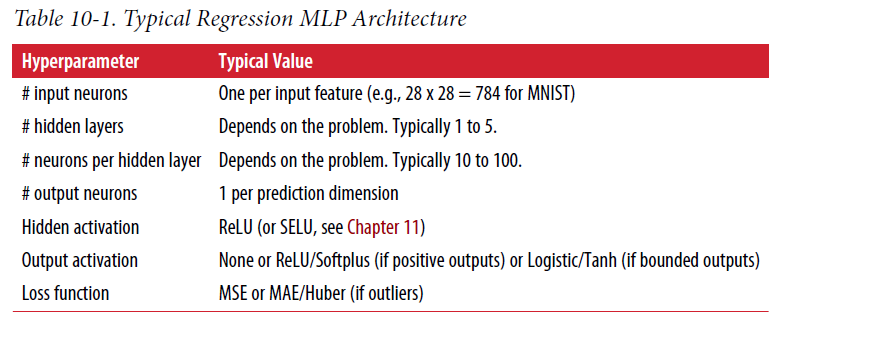


Source- Hands on Machine learning table 10.1


### Creating data to view and fit

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create lables
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

In [ ]:
y == X + 10 # is the relation here 

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [ ]:
X.ndim, X[0].ndim

(1, 0)

In [ ]:
X.shape, X[0].shape

((8,), ())

In [ ]:
tf.constant(X)

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

## Steps in modelling with TensorFlow

1. **Create a model**- define the input,and output layers as well as the hidden layers of a deep learning model. 
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model**- letting the model try and find patterns between features and labels

In [ ]:
# Getting data into tensors
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using sequential API (" Create a model and sequentially go through the following- "" ) TODO
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # take one number as input and give one number as the output
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent, TODO
              metrics=["mae"])
# 3. Fit the model 
# model.fit(X, y, epochs=5) # Fit the model for 5 laps, look at X and y, and try to figure out the pattern, with 5 oppurtunities to learn them
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 495ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([27.0])

1/1 [==============================] - 0s 142ms/step


array([[20.16662]], dtype=float32)

In [ ]:
# 27 shouldve corressponded to 17 but gives 20, however the value 17 lies within the mae range

## Improving our model